# 04 Confusion Matrix, Precision, Recall

In [3]:
import numpy as np

from sklearn.metrics import confusion_matrix

In [8]:
# set seed
np.random.seed(42)

# generate 1d array with value 1 and 0, size 100, with distribution 20% 1 and 80% 0
y_target = np.random.choice([0, 1], size=100, p=[0.8, 0.2])
print(y_target)

[0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# calculate how many 1 and 0 in the array
unique, counts = np.unique(y_target, return_counts=True)
print(dict(zip(unique, counts)))

{0: 82, 1: 18}


In [10]:
# generate simulated predictions with 20% error rate
y_pred = y_target.copy()
n_errors = int(0.2 * len(y_target))
error_indices = np.random.choice(len(y_target), size=n_errors, replace=False)
y_pred[error_indices] = 1 - y_pred[error_indices]  # flip the values
print(y_pred)

[0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [ ]:
# calculate accuracy
accuracy = np.mean(y_target == y_pred)
print(f'Accuracy: {accuracy:.2f}')

# For imbalanced classification, accuracy alone is not reliable metric.
# If the majority class is 0 and the model predicts all samples as 0, it will achieve high accuracy.
# But it completely fails to detect the minority class (1).

Accuracy: 0.80


* tp: true positive  = y_target=1, y_pred=1 -> correctly predicted positive (both target and prediction are 1)
* tn: true negative  = y_target=0, y_pred=0 -> correctly predicted negative (both target and prediction are 0)
* fp: false positive = y_target=0, y_pred=1 -> incorrectly predicted positive (falsely flagged as positive). 
* fn: false negative = y_target=1, y_pred=0 -> incorrectly predicted negative (missed a positive case). Prediction is 0 but actual is 1.


| Term   | Meaning        | Condition                | Description                   |
| ------ | -------------- | ------------------------ | ----------------------------- |
| TP | True Positive  | y_target = 1, y_pred = 1 | Correctly identified positive. Both actual and prediction are 1. |
| TN | True Negative  | y_target = 0, y_pred = 0 | Correctly identified negative. Both actual and prediction are 0. |
| FP | False Positive | y_target = 0, y_pred = 1 | Falsely flagged as positive. Prediction is 1 but actual is 0.   |
| FN | False Negative | y_target = 1, y_pred = 0 | Missed a positive case. Prediction is 0 but actual is 1.      |

The term of True Positive, True Negative, False Positive, False Negative, refer to:
* First word True/False is the model prediction is correct or incorrect.
* Second word Positive/Negative is the model output prediction, positive = 1, negative = 0.



In [11]:

# how to calculate tn, fp, fn, tp manually
tn = np.sum((y_target == 0) & (y_pred == 0))
tp = np.sum((y_target == 1) & (y_pred == 1))
fn = np.sum((y_target == 1) & (y_pred == 0))
fp = np.sum((y_target == 0) & (y_pred == 1))

print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

TN: 65, FP: 17, FN: 3, TP: 15


In [16]:
# using sklearn confusion matrix function.
# output format
# [[TN  FP]
# [FN  TP]]

cm = confusion_matrix(y_target, y_pred)
print(cm)



[[65 17]
 [ 3 15]]


|                 | Predict Negative | Predict Positive |
|-----------------|------------------|------------------|
| Actual Negative | TN               | FP               |
| Actual Positive | FN               | TP               |

In this case:
|                 | Predict Negative | Predict Positive |
|-----------------|------------------|------------------|
| Actual Negative | TN = 65          | FP = 17          |
| Actual Positive | FN = 3           | TP = 15          |


In this example:
* tn = 65 : true negative = y_target=0, y_pred=0, correctly predicted negative, target = prediction for 0
* tp = 15 : true positive = y_target=1, y_pred=1, correctly predicted positive, target = prediction for 1
* fn = 3 : false negative = y_target=1, y_pred=0, incorrectly predicted negative, target = 1 but prediction = 0
* fp = 17 : false positive = y_target=0, y_pred=1, incorrectly predicted positive, target = 0 but prediction = 1


### Accuracy

In [ ]:
# from tn, fp, fn, tp we can calculate other metrics like accuracy, precision, recall, f1 score

# accuracy is the correct predictions / total predictions
# where total predictions is sum of tp, tn, fp, fn = equals to total number of data
# the correct prediction is sum of tp and tn

# accuracy tells you the overall correctness of the model — i.e., what fraction of all predictions are right.
# works well if dataset is balanced, but can be misleading in imbalanced data (fraud detection).

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Accuracy (from cm): {accuracy:.2f}')

Accuracy (from cm): 0.80


### Precision

In [18]:
# precision is the ability of the model to predict the positive class correctly.
# in other words, how many predicted frauds were correct
# precision = tp / (tp + fp)

# Example 1:
# Out of 100 transactions, 80 are not fraud (0) and 20 are fraud (1).
# The model predicts 25 transactions as fraud, but only 20 are real fraud and 5 are not.
# tp = 20 (correctly predicted fraud)
# fp = 5  (predicted fraud but actually not fraud)
# precision = tp / (tp + fp) = 20 / (20 + 5) = 0.8 (80%)

# Example 2:
# Out of 100 transactions, 80 are not fraud (0) and 20 are fraud (1).
# The model predicts 18 transactions as fraud.
# tp = 18 (correctly predicted fraud)
# fp = 0  (predicted fraud but actually not fraud), zero because all predicted fraud are real fraud
# precision = tp / (tp + fp) = 18 / (18 + 0) = 1.0 (100%)





In [ ]:
# in case above
# TN: 65, FP: 17, FN: 3, TP: 15
precision = tp / (tp + fp)
print(f'Precision: {precision:.2f}')
print(tp, fp)
# model predict 32 (15+17) as fraud, but only 15 are real fraud, so precision is 15/(15+17) = 0.47


# Interpretation:
# The model predicted 32 transactions as fraud (15 + 17), but only 15 were actual fraud.
# precision = 0.47, meaning less than half of flagged frauds were correct.
# if precision is high -> few false positives (the model can predict frauds accurately).
# if precision is low -> many false positives (the model predict less accurate).

### Recall

In [20]:
# recall is the ability of the model to detect actual fraud.
# in other words,how many actual frauds were detected
# recall = tp / (tp + fn)

# Example 1:
# Out of 100 transactions, 80 are not fraud (0) and 20 are fraud (1).
# The model predicts 25 transactions as fraud, but only 20 are real fraud and 5 are not.
# tp = 20   correctly predicted fraud
# fp = 5    predicted fraud but actually not fraud
# fn = 0    missed fraud (none missed)
# tn = 75   correctly predicted not fraud
# recall = tp / (tp + fn) = 20 / (20 + 0) = 1.0 (100%)

# Example 2:
# Out of 100 transactions, 80 are not fraud (0) and 20 are fraud (1).
# The model predicts 18 transactions as fraud, but only 15 are real fraud and 3 are not.
# tp = 15   correctly predicted fraud
# fp = 3    predicted fraud but actually not fraud
# fn = 5    missed fraud (5 missed)
# tn = 77   correctly predicted not fraud
# recall = tp / (tp + fn) = 15 / (15 + 5) = 0.75 (75%)





In [21]:
# in case above
# TN: 65, FP: 17, FN: 3, TP: 15
recall = tp / (tp + fn)
print(f'Recall: {recall:.2f}')
print(tp, fn)
# model predict 18 as fraud, and 15 of them were correct. It missed 3 real frauds.
# so recall is 15/(15+3) = 0.83

# Interpretation:
# The model predicted 18 transactions as fraud, and 15 were correct. 3 is missed frauds. 
# so recall is 0.83, meaning it detected 83% of actual frauds.
# if recall is high -> few false negatives (the model can detect frauds well).
# if recall is low -> many false negatives (the model misses many frauds).



Recall: 0.83
15 3


If the model predicts more frauds than actually exist (overpredicts), recall can reach 1, because it catches all actual frauds, even though many of its predictions are wrong.

If the model predicts fewer frauds than actually exist (underpredicts), precision can reach 1, because all of its fraud predictions are correct, even though some actual frauds are missed.

In simple words:
* Recall = ability to detect fraud (catching positives)
* Precision = ability to be correct when predicting fraud

[[TN  FP]

 [FN  TP]]


 Precision is in column FP-TP

 Recall is in row FN-TP


Real case analogy, in airport illegal drug checking.
* Precision, how accurate the detection is

  Case 1: security flags 10 bags, but only 3 really contain illegal drugs and 7 are just personal medicine.
  then precision = 3 / (3 + 7) = 0.3 (30%), it means many false alarms.

  Case 2: security flags 10 bags, and 9 really contain illegal drugs and 1 are just personal medicine.
  then precision = 9 / (9 + 1) = 0.9 (90%), the detector is accurate.

  High precision = security rarely makes false alarms

  Low precision = security keeps bothering innocent travelers

* Recall, how many illegal drugs are detected

  Case 1: there were 10 bags with illegal drugs and security caught 4,
  then recall = 4 / (4 + 6) = 0.4 (40%), the detector missed many illegal drugs (poor recall).

  Case 2: there were 10 bags with illegal drugs and security caught 9,
  then recall = 9 / (9 + 1) = 0.9 (90%), the detector found almost of illegal drugs.

  High recall = Security catches almost all illegal drugs.

  Low recall = Many illegal drugs slip through undetected.


                       Actual Condition
  |                   | Actual: No Drugs      | Actual: Drugs             |
  |-------------------|----------------------|---------------------------|
  | Predicted: No Drugs | TN: Innocent bag (correctly ignored) | FN: Missed drug bag (drugs passed check) |
  | Predicted: Drugs    | FP: False alarm (personal meds)      | TP: Caught drug bag (correctly detected) |


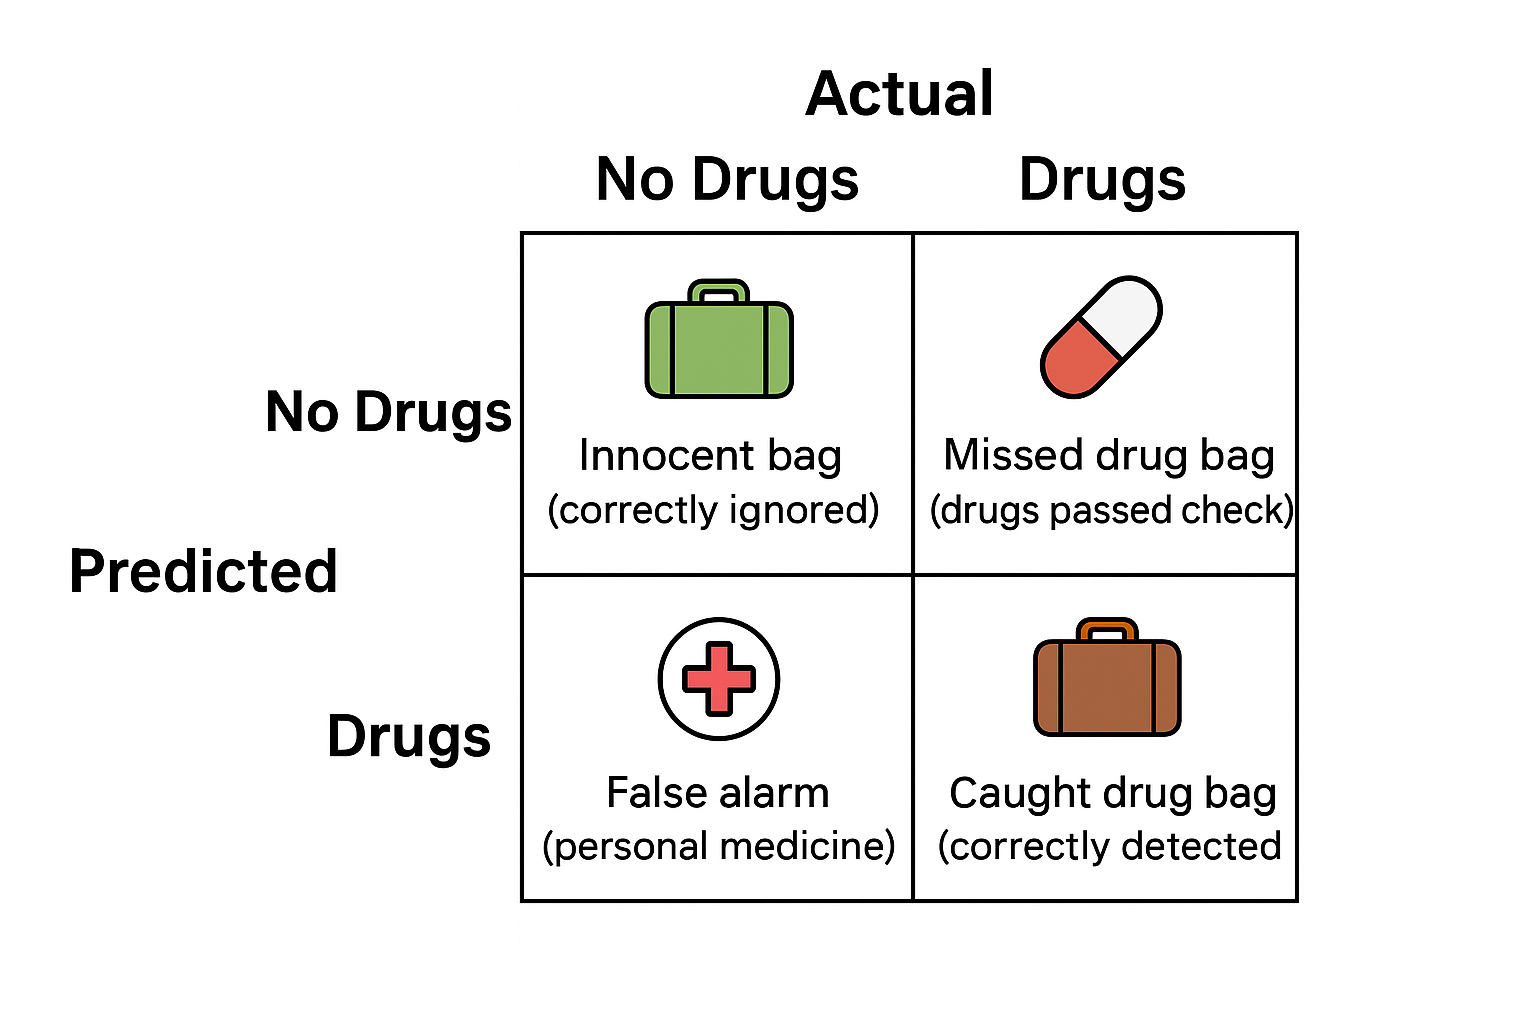